# EDA of the Advertising Department

+ Overview and Summarize
+ Data pre-processing
+ Analysis the Data Of Advertising Department
+ Data Visualization: Bar Plots, Line Plots, Displots
+ Calculating the metric CTR
+ Search for bugs in analytical blogs
+ Conclusion

# Overview and Summarize

According to the given data, let's imagine that we got a job in the advertising department team as a data analyst. The boss comes to us and says that several incomprehensible stories have happened: the charts have grown up for some reasons.

This project mainly focuses on following parts of data analysis and visualization:
   1. Analyze jumps in advertisements
   2. Calculating the CTR metric
   3. Search for analytical bugs

# Dataset Columns

+ ad_id: The id of ad
+ event: Shows whether the ad was viewed or clicked
+ time: The date given in timestamp format
+ date: The date when ad was published
+ ad_cost_type: Type of advertising costs (CPM - Cost per mile)
+ has_video: Boolean expression whether the ad had a video or not
+ client_union_id: id of the author of advertising 
+ campaign_union_id: Which company had an ad 
+ platform: the platform where the advertisement was placed
+ ad_cost: advertising costs (For example: CPM - 1000 VIEWS, CPC - 1000 CLICKS)
+ target_audience_count: shows which audience the ads were targeted to
+ user_id: the user who saw the ad

# Research Questions

   1. Why there was a jump on fifth of April?
   2. Find top 10 CTR ads. Does the average and median CTR of ads differ in our data?
   3. Search for analytical bugs. Is this problem observed on all platforms?
   4. Are there any differences in the CTR of an ad with a video and without?
   5. And what is the 95th percentile CTR for all ads for 2019-04-04?

# Data pre-processing

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [9]:
ads_data = pd.read_csv("ads_data.csv.zip", compression='zip') # instead of manually unzipping the data, just add compression = 'zip'
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29


In [10]:
ads_data.shape # check the size of dataset 

(3176714, 12)

In [11]:
ads_data.dtypes # check the values for the data type

ad_id                      int64
time                       int64
event                     object
date                      object
ad_cost_type              object
has_video                  int64
client_union_id            int64
campaign_union_id          int64
platform                  object
ad_cost                  float64
target_audience_count      int64
user_id                    int64
dtype: object

In [12]:
ads_data['full_date'] = pd.to_datetime(ads_data.time, unit='s') # since the time column given in timestamp, we add unit='s'
ads_data['date'] = pd.to_datetime(ads_data.date)    # convert to datetime

In [13]:
ads_data.dtypes

ad_id                             int64
time                              int64
event                            object
date                     datetime64[ns]
ad_cost_type                     object
has_video                         int64
client_union_id                   int64
campaign_union_id                 int64
platform                         object
ad_cost                         float64
target_audience_count             int64
user_id                           int64
full_date                datetime64[ns]
dtype: object

# Analysis the Data Of Advertising Department

<AxesSubplot:xlabel='date'>

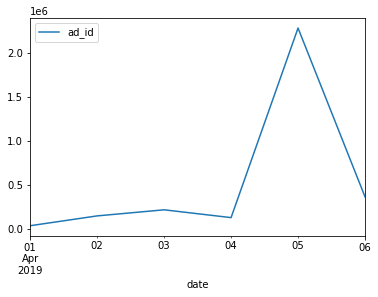

In [14]:
ads_data.groupby('date').agg({'ad_id': 'count'}).plot() # get statistics by days to get a general picture of events

# pandas .plot() is almost the same as sns.lineplot()

# It can be clearly seen, that On the fifth of April there was a significant jump in advertising

# It would be interesting to figure out why this happened!

In [15]:
# Firstly, just count the number of views and clicks of advertisements by dates

# we used pivot table in order to mate it easier to work with clicks\views in the fute

In [16]:
ads_data.groupby(['date', 'event'], as_index=False)\
    .agg({"ad_id":"count"})\
    .rename(columns={"ad_id":"number_of_events"})\
    .pivot(index='date', columns='event', values='number_of_events')\
    .reset_index()

# Indeed, we really see this boom on the fifth of April

event,date,click,view
0,2019-04-01,735,34832
1,2019-04-02,1518,145811
2,2019-04-03,1678,214851
3,2019-04-04,1517,126182
4,2019-04-05,501595,1783288
5,2019-04-06,80420,284287


In [17]:
??pd.pivot # in case you forgot how the function works in pandas

Object `pd.pivot # in case you forgot how the function works in pandas` not found.


In [18]:
ads_data.ad_id.nunique() # getting the number of unique advertisement id

355

Why there was a boom on the fifth of April?

Well, there are many hypotheses here: 
   1. It could be some special day, such as Black Friday and all advertisers decided to spin more ads
   
   2. Some other major advertiser came in and started running most of the ads

In [19]:
# since we know that the boom was on the fifth of April, let's get the statistics of each ad_id on this particular day

ads_data[ads_data.date == '2019-04-05']\
    .groupby("ad_id", as_index=False)\
    .agg({"time":"count"})\
    .rename(columns={"time":"numbers"})\
    .sort_values("numbers", ascending=False)\
    .head()

,ad_id,numbers
108,112583,2166611
27,29927,27186
65,44635,8268
81,46583,7327
66,44956,5656


In [20]:
suspicious_id = 112583 #  this id has much more events than all the others

In [21]:
# let's check what does this id represent in general

ads_data.query("ad_id == @suspicious_id")\
    .groupby("date", as_index=False)\
    .agg({"time":"count"})

# we can observe that this ad run only two days

,date,time
0,2019-04-05,2166611
1,2019-04-06,348613


In [22]:
ads_data.query("ad_id == @suspicious_id").head(1) 

# thus, we found out what kind of client pulled the lion's share of all advertisements
# and why there was such a boom on the fifth of april

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
527124,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,web,199.4,239408,4355,2019-04-05 16:10:36


# Calculating the metric CTR

Tasks: 
1. Find the top 10 ads by CTR for all time.
2. Does the average and median CTR of ads differ in our data?
---
CTR is the ratio of all ad views to clicks

In [23]:
ads_data_by_ad = ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index()

In [24]:
ads_data_by_ad

event,ad_id,click,view
0,3,9.0,490.0
1,2132,1.0,95.0
2,2276,2.0,1454.0
3,2475,NaN,132.0
4,2643,3.0,286.0
...,...,...,...
350,121941,1.0,640.0
351,121943,15.0,1722.0
352,122042,1.0,155.0
353,122063,1.0,260.0


In [25]:
ads_data_by_ad = ads_data_by_ad.assign(ctr = ads_data_by_ad.click / ads_data_by_ad.view,
                                      ctr_per = 100 * (ads_data_by_ad.click / ads_data_by_ad.view))
# assign function is useful because you can create several columns at once -> instead of the usual  ' df['some_column']= ' way

In [26]:
top_10_ctr = ads_data_by_ad.sort_values("ctr", ascending=False).head(10) # getting top 10 ads by ctr

In [27]:
top_10_ctr

event,ad_id,click,view,ctr,ctr_per
289,112583,580436.0,1934788.0,0.300000,29.999979
324,119450,258.0,1254.0,0.205742,20.574163
125,38575,43.0,257.0,0.167315,16.731518
144,40968,29.0,217.0,0.133641,13.364055
207,45642,42.0,344.0,0.122093,12.209302
283,110924,11.0,95.0,0.115789,11.578947
194,45043,28.0,245.0,0.114286,11.428571
96,35034,112.0,997.0,0.112337,11.233701
5,4585,53.0,476.0,0.111345,11.134454
328,120347,236.0,2168.0,0.108856,10.885609


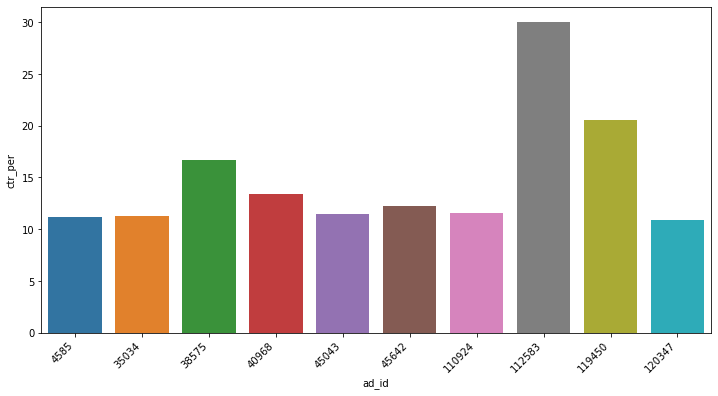

In [28]:
plt.figure(figsize=(12, 6))
chart = sns.barplot(data = top_10_ctr, x="ad_id", y="ctr_per")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show() 

# visualizing top 10 ads by ctr 

Does the average and median CTR of ads differ in our data?

In [29]:
ads_data_by_ad.ctr.mean() # average CTR is about 2%

0.020628096080757965

In [30]:
ads_data_by_ad.ctr.median() # median CTR is about 1%

0.010753240746688594

It can be concluded, that they differ twice. But why?
-

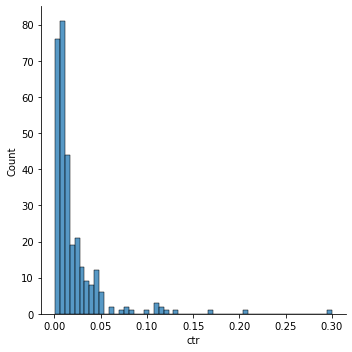

In [31]:
sns.displot(ads_data_by_ad.ctr, kde=False) # displot() shows the distribution 

The CTR distribution looks rather strange. There are many ads with a low CTR, meanwhile there are few ads with a high CTR. It can be expained that such data is hard to characterize with one number. For example: it is bad to take the average value of people's salaries, since the calculation includes both the richest people and people with low earnings. That's why we pick the median value of CTR.

# Search for bugs in analytical blogs

It looks like there is a bug in our logs, ads come with clicks, but without views!
How many such ads are there, are there any patterns? Is this problem observed on all platforms?

In [32]:
ads_data_by_ad

event,ad_id,click,view,ctr,ctr_per
0,3,9.0,490.0,0.018367,1.836735
1,2132,1.0,95.0,0.010526,1.052632
2,2276,2.0,1454.0,0.001376,0.137552
3,2475,NaN,132.0,NaN,NaN
4,2643,3.0,286.0,0.010490,1.048951
...,...,...,...,...,...
350,121941,1.0,640.0,0.001563,0.156250
351,121943,15.0,1722.0,0.008711,0.871080
352,122042,1.0,155.0,0.006452,0.645161
353,122063,1.0,260.0,0.003846,0.384615


In [33]:
ads_data_by_ad = ads_data_by_ad.fillna(0) # No clicks is 0 clicks

In [34]:
ads_data_by_ad.query("click == 0").shape # 40 ads come with zero clicks

(40, 5)

In [35]:
ads_ids_bug = ads_data_by_ad.query("click==0").ad_id 

In [36]:
ads_ids_bug

3        2475
26      16444
29      16678
30      16845
38      20871
43      23108
56      26427
58      26880
73      29915
78      30692
88      33802
89      33827
94      34895
132     40226
135     40307
141     40750
154     41866
157     41937
182     44327
183     44345
186     44546
188     44585
200     45365
217     46022
218     46024
220     46433
223     46452
232     46754
248     98344
261    104799
276    109397
291    113051
305    115860
307    116717
310    117095
312    117363
319    119083
341    120790
345    121513
347    121695
Name: ad_id, dtype: int64

In [37]:
ads_data[ads_data.ad_id.isin(ads_ids_bug)] # We select from the initial data ids with bug

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
38,109397,1554135907,view,2019-04-01,CPC,0,109255,109393,android,50.1,107796,196,2019-04-01 16:25:07
40,33802,1554135907,view,2019-04-01,CPM,0,21845,33802,ios,195.4,6952,474,2019-04-01 16:25:07
64,23108,1554135901,view,2019-04-01,CPC,0,5345,23108,ios,48.2,775393,107,2019-04-01 16:25:01
65,23108,1554135901,view,2019-04-01,CPC,0,5345,23108,ios,48.2,775393,245,2019-04-01 16:25:01
77,44546,1554135731,view,2019-04-01,CPM,0,32804,44546,android,202.7,18766,282,2019-04-01 16:22:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165803,113051,1554501002,view,2019-04-06,CPM,0,113036,113043,web,196.8,300797,4896,2019-04-05 21:50:02
3168109,113051,1554501007,view,2019-04-06,CPM,0,113036,113043,android,196.8,300797,7600,2019-04-05 21:50:07
3171783,121513,1554501109,view,2019-04-06,CPM,0,121513,121513,android,200.2,70643,6275,2019-04-05 21:51:49
3171791,121513,1554501109,view,2019-04-06,CPM,0,121513,121513,ios,200.2,70643,8435,2019-04-05 21:51:49


In [38]:
ads_with_bugs = ads_data[ads_data.ad_id.isin(ads_ids_bug)]\
    .groupby("platform", as_index=False)\
    .agg({"ad_id":"count"})\
    .rename(columns={"ad_id":"bug_number"})\
    .sort_values("bug_number")

<AxesSubplot:xlabel='bug_number', ylabel='platform'>

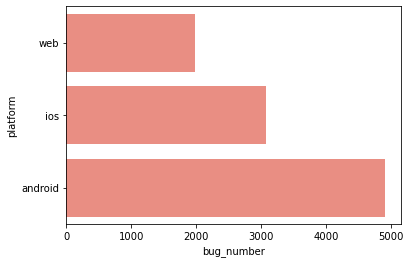

In [39]:
sns.barplot(data=ads_with_bugs, x="bug_number", y="platform", orient="h", color="salmon")

It would seem that the bug appears more often on android devices than on other devices. However, this is a hasty conclusion. Because initially the number of events on android is more. Therefore, the bug appears on android not because it happens there more often, but because there are more events with android in general.

In [40]:
ads_data_by_platform = ads_data\
    .groupby("platform", as_index=False)\
    .agg({"ad_id":"count"})\
    .rename(columns={"ad_id":"number_of_events"})\
    .sort_values("number_of_events")

In [41]:
ads_data_by_platform

,platform,number_of_events
2,web,635425
1,ios,953078
0,android,1588211


<AxesSubplot:xlabel='platform', ylabel='number_of_events'>

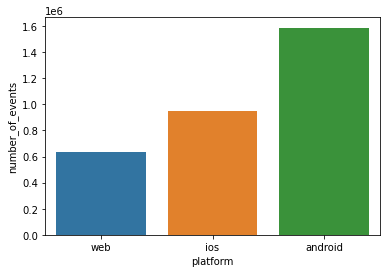

In [42]:
sns.barplot(data=ads_data_by_platform, x="platform", y="number_of_events")

Are there any differences in the CTR of an ad with a video and without?
And what is the 95th percentile CTR for all ads for 2019-04-04?

In [43]:
df_2019_04_04 =  ads_data[ads_data.date == '2019-04-04'].groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() \
    .fillna(0)

In [44]:
df_2019_04_04['ctr'] = df_2019_04_04.click / df_2019_04_04.view

In [47]:
df_2019_04_04

event,ad_id,click,view,ctr
0,9071,3.0,352.0,0.008523
1,9776,37.0,1115.0,0.033184
2,10601,3.0,848.0,0.003538
3,11887,151.0,8720.0,0.017317
4,12137,1.0,170.0,0.005882
...,...,...,...,...
145,120790,0.0,19.0,0.000000
146,121779,68.0,1116.0,0.060932
147,121790,7.0,701.0,0.009986
148,121941,0.0,95.0,0.000000


In [49]:
print(f"the 95th percentile CTR for all ads for 2019-04-04 is {df_2019_04_04[df_2019_04_04.click > 0].ctr.quantile(q=0.95)}")

the 95th percentile CTR for all ads for 2019-04-04 is 0.10211538461538454


# Conclusion

In conlcusion, In conclusion, we found that the jump in advertising was not due to the fact that the charts just soared up, but because some major advertiser occupied the advertising market for 2 days. Furthemore, we have proved that the average values as a descriptive statistic can have a detrimental effect on the analysis, so we took the median value of the data. Also, sometimes it is very hasty to draw conclusions when analyzing the data (android issue).